In [41]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

n_pts= 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y =  datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
X_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100,1))
print(X)
print(y)

[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]
 [-0.62590326  0.06563904]
 [-0.31262435  0.16753801]
 [-0.1085056   1.39525734]
 [ 0.09825765  0.92775707]
 [-0.36456438  0.4952678 ]
 [ 0.75682188 -1.29115517]
 [ 0.33484534  0.56577649]
 [-0.66134642  0.44958817]
 [ 0.34335208 -0.44400876]
 [-0.42758595  0.97114478]
 [-0.09837844  0.65447456]
 [ 0.45694611  0.66516486]
 [-0.12901503  0.43054573]
 [ 0.67045866 -1.1421639 ]
 [ 0.82493653 -0.30010394]
 [ 0.72261948 -0.58483205]
 [-0.49886163  0.77528908]
 [-0.03991778 -0.00694082]
 [ 1.05814117 -0.64357437]
 [ 0.60152659 -0.38650986]
 [ 0.57181979 -1.24479028]
 [-0.20505257  1.09629281]
 [ 1.14347639 -0.60809296]
 [-0.97932046  0.57980963]
 [ 0.20367449 -0.4708371 ]
 [-0.79298479  0.01499075]
 [ 0.5081264  -0.57758555]
 

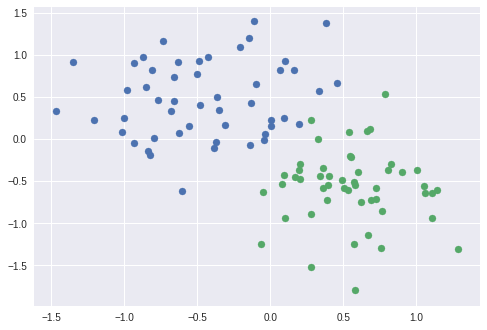

In [42]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])
  
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
    
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [44]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [0]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]
def get_params():
  return w1.item(), w2.item(), b1.item()

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

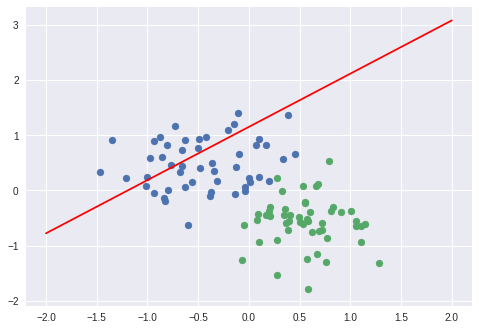

In [47]:
plot_fit("initial modal")

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [49]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(X_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())
  losses.append(loss.item())
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss 0.6185115575790405
epoch: 1 loss 0.6174639463424683
epoch: 2 loss 0.6164201498031616
epoch: 3 loss 0.6153794527053833
epoch: 4 loss 0.614342451095581
epoch: 5 loss 0.6133086681365967
epoch: 6 loss 0.6122783422470093
epoch: 7 loss 0.6112515330314636
epoch: 8 loss 0.6102280616760254
epoch: 9 loss 0.6092080473899841
epoch: 10 loss 0.6081910729408264
epoch: 11 loss 0.6071775555610657
epoch: 12 loss 0.606167733669281
epoch: 13 loss 0.6051608324050903
epoch: 14 loss 0.604157567024231
epoch: 15 loss 0.6031574606895447
epoch: 16 loss 0.602160632610321
epoch: 17 loss 0.6011670827865601
epoch: 18 loss 0.6001767516136169
epoch: 19 loss 0.599189817905426
epoch: 20 loss 0.5982059836387634
epoch: 21 loss 0.5972254276275635
epoch: 22 loss 0.5962479114532471
epoch: 23 loss 0.5952739119529724
epoch: 24 loss 0.5943028926849365
epoch: 25 loss 0.5933352112770081
epoch: 26 loss 0.5923705101013184
epoch: 27 loss 0.5914090275764465
epoch: 28 loss 0.5904508829116821
epoch: 29 loss 0.589495718479

Text(0.5, 0, 'epoch')

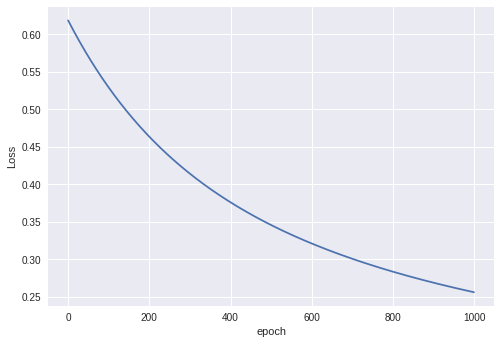

In [50]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

Red point positive probability = 0.9424158334732056
Black point positive probability = 0.05055497586727142
Red point in class 1
Black point in class 0


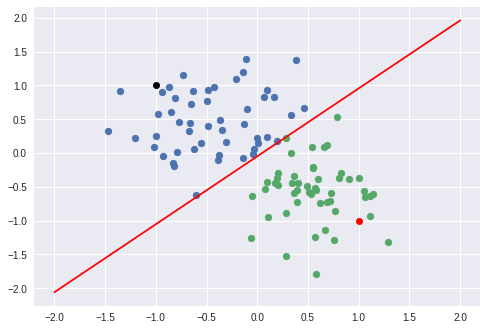

In [51]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print ("Red point positive probability = {}".format(model.forward(point1).item()))
print ("Black point positive probability = {}".format(model.forward(point2).item()))
print ("Red point in class {}".format(model.predict(point1)))
print ("Black point in class {}".format(model.predict(point2)))
plot_fit('Trained Model')